In [2]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy import constants as c
c.Msun = 1.989e30

import sys
sys.path.append("../")
import GSHEWaveform

# Functions to turn on and off custom plotting
def default_mplstyle():
    mpl.rcParams.update(mpl.rcParamsDefault)
    
def custom_mplstyle():
    mpl.style.use("../plot_style.txt")

In units of $c=G=1$, we have that

\begin{equation}
    \epsilon = \frac{\lambda}{M} = 2 \frac{\lambda}{R_{\rm s}}.
\end{equation}


Going back to dimension-ful quantities:

\begin{equation}
\begin{split}
    \epsilon
    &= \frac{c^2}{G} \frac{1}{M} \lambda\\
    &= \frac{c^3}{G M_\odot} \left( \frac{M}{M_\odot}\right)^{-1} \frac{1}{f}\\
    &= \frac{c^3}{G M_\odot} \frac{1}{f ~ \left(M / M_\odot\right)}
\end{split}
\end{equation}

In [30]:
f = np.logspace(-4, 9, 2000)
M = np.logspace(-1, 10, 2000)


X = np.array([x.reshape(-1, ) for x in np.meshgrid(f, M)]).T
fs, Ms = [X[:, i].reshape(f.size, M.size) for i in range(2)]

epsilons = GSHEWaveform.epsilon_from_freq(X[:,0], X[:, 1]).reshape(fs.shape)
epsilons[epsilons > 0.1] = np.nan

<IPython.core.display.Javascript object>


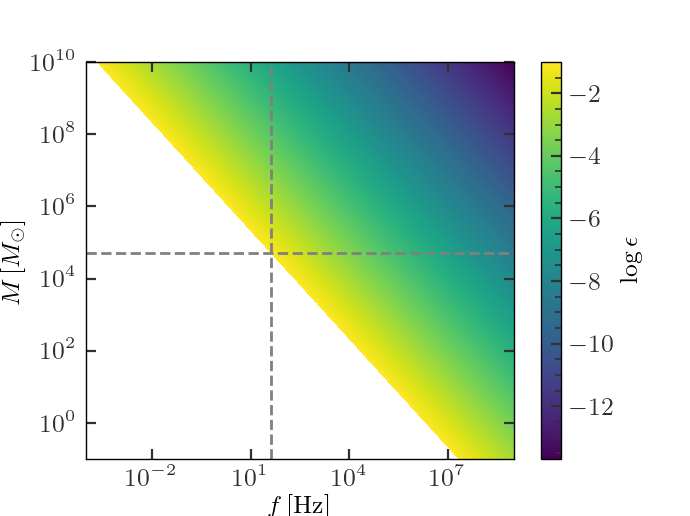

In [31]:
custom_mplstyle()

plt.figure()
plt.pcolormesh(fs, Ms, np.log10(epsilons), shading="auto", rasterized=True)
plt.yscale('log')
plt.xscale('log')
plt.axvline(40, c="gray", ls="--")
plt.axhline(5e4, c="gray", ls="--")
plt.colorbar(label=r"$\log\epsilon$")
plt.xlabel(r"$f \left[\mathrm{Hz}\right]$")
plt.ylabel(r"$M \left[M_\odot\right]$")
plt.savefig("/Users/richard/Downloads/Mtofreq_dependence.pdf", bbox_inches="tight")
plt.show()